In [1]:
from google.colab import files
uploaded = files.upload()

Saving train_2v.csv to train_2v.csv


In [3]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['train_2v.csv']))

In [4]:
df.head(5)  #The first 5 observations

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [5]:
df.tail(5)  #The last 5 observations

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0
43399,36271,Female,82.0,0,0,Yes,Private,Urban,79.48,20.6,never smoked,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [7]:
print("Index/Labels")
print(df.index)    #These are the indexes
print()

print("Column Names")
print(df.columns)  #These are the columns or features of the data set
print()

print("Feature Types")
print(df.dtypes)    #The data types of each column
print()

print("Shape details:")
print(df.shape)     #The number of rows(observations) and columns (features)

Index/Labels
RangeIndex(start=0, stop=43400, step=1)

Column Names
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Feature Types
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Shape details:
(43400, 12)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


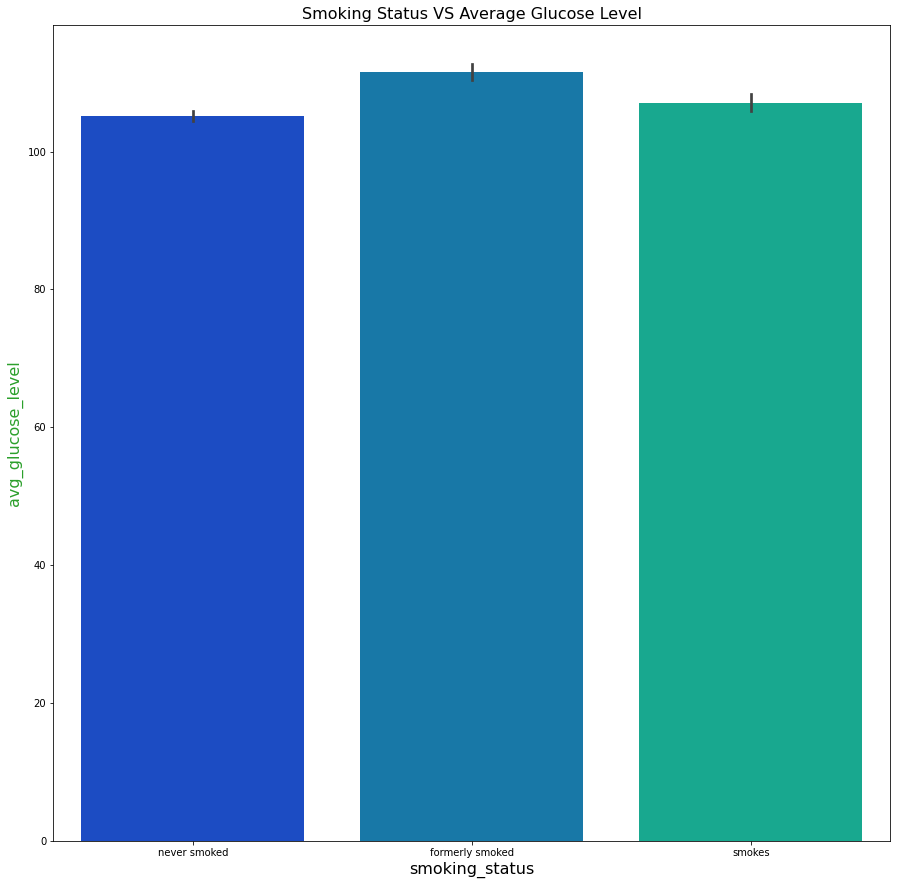

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(15,15))
color = 'tab:green'
ax1.set_title('Smoking Status VS Average Glucose Level', fontsize=16)
ax1.set_xlabel('smoking_status', fontsize=16)
ax1.set_ylabel('avg_glucose_level', fontsize=16, color=color)
ax2 = sns.barplot(x='smoking_status', y='avg_glucose_level', data = df , palette='winter')
ax1.tick_params(axis='y')
plt.show()

In this case, the independent variable would be the smoking status of the patient and the dependent variable would be the average glucose level. Individuals who have formerly smoked appear to reach higher average glucose levels compared to individuals who never smoked or are currently smokers. 

#Missing Data

In [9]:
null = df.isna().sum()/len(df)  #Initial check for missing values in data set. 
null[null > 0].sort_values()    #There are some missing values in the "bmi" and "smoking_status" features.

bmi               0.033687
smoking_status    0.306267
dtype: float64

In [10]:
df.isnull()   #All missing values will show up as "True"

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,False,False,False,False,False,False,False,False,False,False,False,False
43396,False,False,False,False,False,False,False,False,False,False,False,False
43397,False,False,False,False,False,False,False,False,False,False,False,False
43398,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
null_data = df[df.isnull().any(axis=1)]   #This line returns only the rows with a "True" value, indicating a missing value in that row.
null_data                                 #NaN represents the missing value.

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
10,10460,Female,79.0,0,0,Yes,Govt_job,Urban,77.08,35.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43385,5366,Female,66.0,0,0,Yes,Self-employed,Urban,92.10,24.8,NaN,0
43388,31321,Female,64.0,1,0,Yes,Govt_job,Rural,228.43,NaN,smokes,0
43389,30759,Male,14.0,0,0,No,children,Urban,82.48,24.8,NaN,0
43391,30077,Male,6.0,0,0,No,children,Urban,77.48,19.1,NaN,0


There are 14,328 observations missing values in total. Since the total number of observations for the overall data set is large with 43,400 observations, I will drop the rows with missing data.

In [12]:
df.dropna(subset = ['bmi','smoking_status'], inplace=True)

In [13]:
null = df.isna().sum()/len(df)    #This is used to recheck for missing data. 
null[null > 0].sort_values()      #In this case there are none because the missing values were dropped by the last line.

Series([], dtype: float64)

In [14]:
df.duplicated().sum()              #There are no duplicated values in this data set.

0

#Transformations

The first transformation is to change the data types for the "id", "hypertension","heart_disease", and "stroke" features to objects because the values should be categorical instead of continous.

In [15]:
df["id"]=df['id'].astype(object)
df["hypertension"]=df['hypertension'].astype(object)
df["heart_disease"]=df['heart_disease'].astype(object)
df["stroke"]=df['stroke'].astype(object)

In [16]:
df.dtypes   #The data types have been changed appropriately.

id                    object
gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object

For the second transformation, the value of "0" is changed to "No" to indicate the patient did not suffer from hypertension, heart disease, or a stroke.

The value of "1" is changed to "Yes" to indicate that the patient is suffering from hypertension, heart diease or has suffered a stroke.

This makes the data easier to understand at first glance from a lay person's perspective.

According to the data dictionary:
* Hypertension feature: 0 means no hypertension, 1 means suffering from hypertension
* Heart_disease feature: 0 means no heart disease, 1 means suffering from heart disease
* Stroke feature: 0 means no stroke, 1 means suffered stroke

In [17]:
df=df.replace([0,1],['No','Yes'])   #This line replaces all values that were "0" with "No" and "1" with "Yes".
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30468,Male,58.0,Yes,No,Yes,Private,Urban,87.96,39.2,never smoked,No
3,56543,Female,70.0,No,No,Yes,Private,Rural,69.04,35.9,formerly smoked,No
6,52800,Female,52.0,No,No,Yes,Private,Urban,77.59,17.7,formerly smoked,No
7,41413,Female,75.0,No,Yes,Yes,Self-employed,Rural,243.53,27.0,never smoked,No
8,15266,Female,32.0,No,No,Yes,Private,Rural,77.67,32.3,smokes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,No,No,No,children,Urban,58.64,20.4,never smoked,No
43396,5450,Female,56.0,No,No,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,No
43397,28375,Female,82.0,Yes,No,Yes,Private,Urban,91.94,28.9,formerly smoked,No
43398,27973,Male,40.0,No,No,Yes,Private,Urban,99.16,33.2,never smoked,No


In [18]:
df['work_type'].value_counts()

Private          18954
Self-employed     5204
Govt_job          4196
children           617
Never_worked       101
Name: work_type, dtype: int64

The third transformation is to change "Govt_job" to "Government Job", "Never_worked" to "Never Worked", and "children" to "Children" to clean some data for the "work_type" column.

In [19]:
df=df.replace(['Govt_job','Never_worked','children'],['Government Job','Never Worked','Children'])
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30468,Male,58.0,Yes,No,Yes,Private,Urban,87.96,39.2,never smoked,No
3,56543,Female,70.0,No,No,Yes,Private,Rural,69.04,35.9,formerly smoked,No
6,52800,Female,52.0,No,No,Yes,Private,Urban,77.59,17.7,formerly smoked,No
7,41413,Female,75.0,No,Yes,Yes,Self-employed,Rural,243.53,27.0,never smoked,No
8,15266,Female,32.0,No,No,Yes,Private,Rural,77.67,32.3,smokes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,No,No,No,Children,Urban,58.64,20.4,never smoked,No
43396,5450,Female,56.0,No,No,Yes,Government Job,Urban,213.61,55.4,formerly smoked,No
43397,28375,Female,82.0,Yes,No,Yes,Private,Urban,91.94,28.9,formerly smoked,No
43398,27973,Male,40.0,No,No,Yes,Private,Urban,99.16,33.2,never smoked,No


The fourth transformation is to change the feature names to look more neat.

In [20]:
df=df.rename(columns={'id':'ID','gender':'Gender','age':'Age','hypertension':'Hypertension','heart_disease':'Heart Disease','ever_married':'Ever Married','work_type':'Work Type','Residence_type':'Residence Type','avg_glucose_level':'Average Glucose Level','bmi':'BMI','smoking_status':'Smoking Status','stroke':'Stroke'})
df

,ID,Gender,Age,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,Smoking Status,Stroke
1,30468,Male,58.0,Yes,No,Yes,Private,Urban,87.96,39.2,never smoked,No
3,56543,Female,70.0,No,No,Yes,Private,Rural,69.04,35.9,formerly smoked,No
6,52800,Female,52.0,No,No,Yes,Private,Urban,77.59,17.7,formerly smoked,No
7,41413,Female,75.0,No,Yes,Yes,Self-employed,Rural,243.53,27.0,never smoked,No
8,15266,Female,32.0,No,No,Yes,Private,Rural,77.67,32.3,smokes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,No,No,No,Children,Urban,58.64,20.4,never smoked,No
43396,5450,Female,56.0,No,No,Yes,Government Job,Urban,213.61,55.4,formerly smoked,No
43397,28375,Female,82.0,Yes,No,Yes,Private,Urban,91.94,28.9,formerly smoked,No
43398,27973,Male,40.0,No,No,Yes,Private,Urban,99.16,33.2,never smoked,No


In [21]:
df_sorted = df.sort_values (by='Gender')  #This sorts the observations based on gender by showing all the "females" first, followed by "males" and lastly "other".
df_sorted

,ID,Gender,Age,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,Smoking Status,Stroke
21635,8916,Female,39.0,No,No,Yes,Private,Urban,87.27,19.5,smokes,No
25441,63783,Female,58.0,No,No,Yes,Self-employed,Urban,101.86,32.2,smokes,No
25440,16397,Female,58.0,No,No,Yes,Self-employed,Rural,86.77,39.7,never smoked,No
25438,23218,Female,69.0,No,No,Yes,Self-employed,Urban,86.65,26.3,never smoked,No
25437,4545,Female,61.0,No,No,Yes,Private,Urban,223.41,36.6,never smoked,No
...,...,...,...,...,...,...,...,...,...,...,...,...
40768,14986,Other,11.0,No,No,No,Children,Urban,101.30,18.1,formerly smoked,No
19748,13471,Other,39.0,No,No,Yes,Government Job,Urban,95.59,32.0,formerly smoked,No
26199,42452,Other,10.0,No,No,No,Children,Rural,72.05,21.2,formerly smoked,No
21041,31015,Other,19.0,No,No,No,Private,Rural,75.76,32.2,formerly smoked,No


##Central tendency, distribution of responses and quartile ranges (.25, .50, .75)

In [22]:
df.describe()     #These are the descriptive statistics of the continous data.

,Age,Average Glucose Level,BMI
count,29072.000000,29072.000000,29072.000000
mean,47.671746,106.403225,30.054166
std,18.734490,45.268512,7.193908
min,10.000000,55.010000,10.100000
25%,32.000000,77.627500,25.000000
50%,48.000000,92.130000,28.900000
75%,62.000000,113.910000,33.900000
max,82.000000,291.050000,92.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f127a208390>,
      dtype=object)

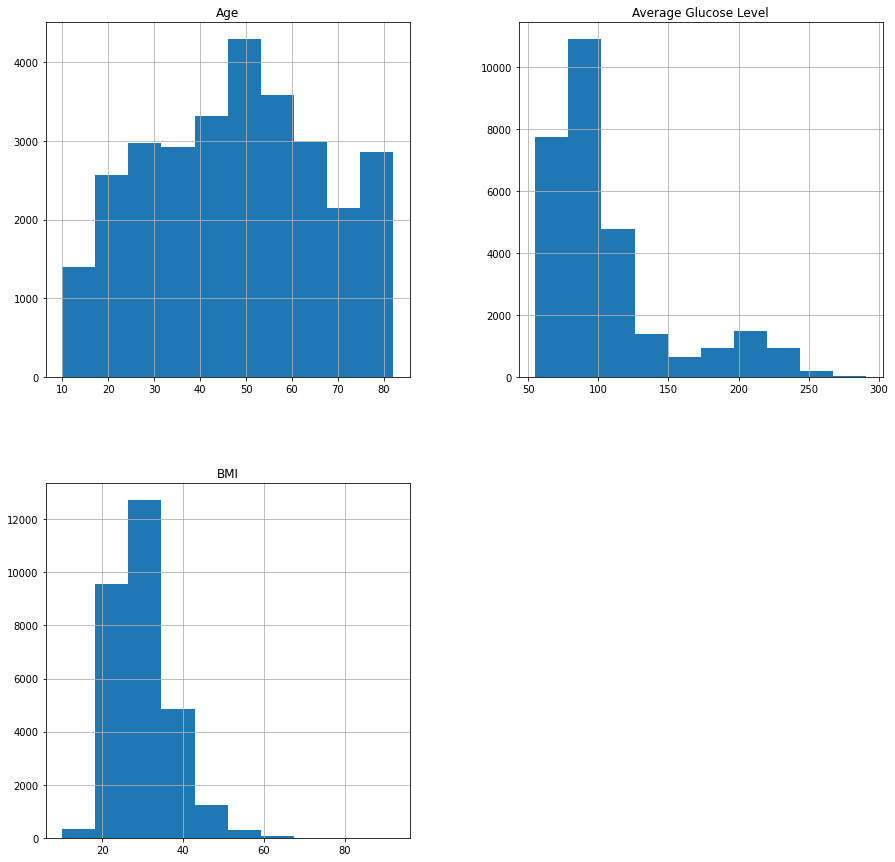

In [23]:
df.hist(figsize=(15,15))    #These are the distributions in histogram form for the continous data.

The distribution for age appears to be a normal distribution while the distributions for average glucose level and BMI are skewed to the right.

In [24]:
df.quantile([.25, .50, .75])   #These are the quartile ranges (.25, .50, .75) for the continous data.

,Age,Average Glucose Level,BMI
0.25,32.0,77.6275,25.0
0.50,48.0,92.1300,28.9
0.75,62.0,113.9100,33.9


In [25]:
df_group_work_type = df.groupby(['Work Type'])    #Children and individuals who never worked have the lowest means for age, avergage glucose level and BMI.
df_group_work_type.describe()

Age                              ...   BMI                  
                  count       mean        std   min  ...   25%   50%   75%   max
Work Type                                            ...                        
Children          617.0  12.515397   1.651497  10.0  ...  19.2  22.0  25.8  45.9
Government Job   4196.0  49.116063  15.176109  13.0  ...  25.6  29.7  34.4  70.3
Never Worked      101.0  18.554455   8.065327  13.0  ...  22.0  24.6  30.9  49.1
Private         18954.0  45.437058  18.005078  13.0  ...  24.9  28.9  34.0  92.0
Self-employed    5204.0  59.379708  16.519156  13.0  ...  25.5  29.2  33.6  68.5

[5 rows x 24 columns]

In [26]:
df_group_hypertension = df.groupby(['Hypertension'])    #The means for age, average glucose levels, and BMI are lower for individuals who have not suffered from hypertension.
df_group_hypertension.describe()

Age                              ...   BMI                  
                count       mean        std   min  ...   25%   50%   75%   max
Hypertension                                       ...                        
No            25831.0  45.962564  18.583006  10.0  ...  24.7  28.6  33.5  80.1
Yes            3241.0  61.294045  13.683648  13.0  ...  27.5  31.4  36.4  92.0

[2 rows x 24 columns]

In [27]:
df_group_gender = df.groupby(['Gender'])    #The "other" gender has the lowest mean values compared to females and males.
df_group_gender.describe()

Age                                    ...   BMI                        
          count       mean        std   min   25%  ...   min   25%   50%   75%   max
Gender                                             ...                              
Female  17852.0  47.073493  18.685824  10.0  31.0  ...  10.8  24.3  28.5  34.1  82.7
Male    11213.0  48.635691  18.768652  10.0  34.0  ...  10.1  26.0  29.5  33.5  92.0
Other       7.0  29.285714  17.211569  10.0  15.0  ...  18.1  21.8  32.0  32.2  37.2

[3 rows x 24 columns]

In [28]:
df_f = df[df['Gender'] == 'Female']   #These are all the observations that are female.
df_f

,ID,Gender,Age,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,Smoking Status,Stroke
3,56543,Female,70.0,No,No,Yes,Private,Rural,69.04,35.9,formerly smoked,No
6,52800,Female,52.0,No,No,Yes,Private,Urban,77.59,17.7,formerly smoked,No
7,41413,Female,75.0,No,Yes,Yes,Self-employed,Rural,243.53,27.0,never smoked,No
8,15266,Female,32.0,No,No,Yes,Private,Rural,77.67,32.3,smokes,No
9,28674,Female,74.0,Yes,No,Yes,Self-employed,Urban,205.84,54.6,never smoked,No
...,...,...,...,...,...,...,...,...,...,...,...,...
43390,10096,Female,69.0,No,No,Yes,Self-employed,Urban,229.85,31.2,never smoked,No
43395,56196,Female,10.0,No,No,No,Children,Urban,58.64,20.4,never smoked,No
43396,5450,Female,56.0,No,No,Yes,Government Job,Urban,213.61,55.4,formerly smoked,No
43397,28375,Female,82.0,Yes,No,Yes,Private,Urban,91.94,28.9,formerly smoked,No


In [29]:
df_no_f = df[df['Gender'] != 'Female']      #These are all the observations that are not female. 
df_no_f

,ID,Gender,Age,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,Smoking Status,Stroke
1,30468,Male,58.0,Yes,No,Yes,Private,Urban,87.96,39.2,never smoked,No
11,64908,Male,79.0,No,Yes,Yes,Private,Urban,57.08,22.0,formerly smoked,No
15,25774,Male,35.0,No,No,No,Private,Rural,85.37,33.0,never smoked,No
23,4057,Male,71.0,No,No,Yes,Private,Urban,198.21,27.3,formerly smoked,No
32,45222,Male,58.0,Yes,No,No,Private,Urban,55.78,27.5,smokes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
43386,18828,Male,68.0,No,Yes,Yes,Private,Urban,113.60,25.5,never smoked,No
43387,25888,Male,20.0,No,No,No,Private,Rural,83.37,26.5,never smoked,No
43393,69344,Male,39.0,No,No,Yes,Private,Rural,132.22,31.6,never smoked,No
43394,52380,Male,47.0,No,No,No,Government Job,Urban,68.52,25.2,formerly smoked,No


##Outliers

In [30]:
continuous = df[['Age','Average Glucose Level','BMI']]
continuous_labels = list(continuous.columns)

In [31]:
import matplotlib.pyplot as plt
plt.close('all')
import numpy as np

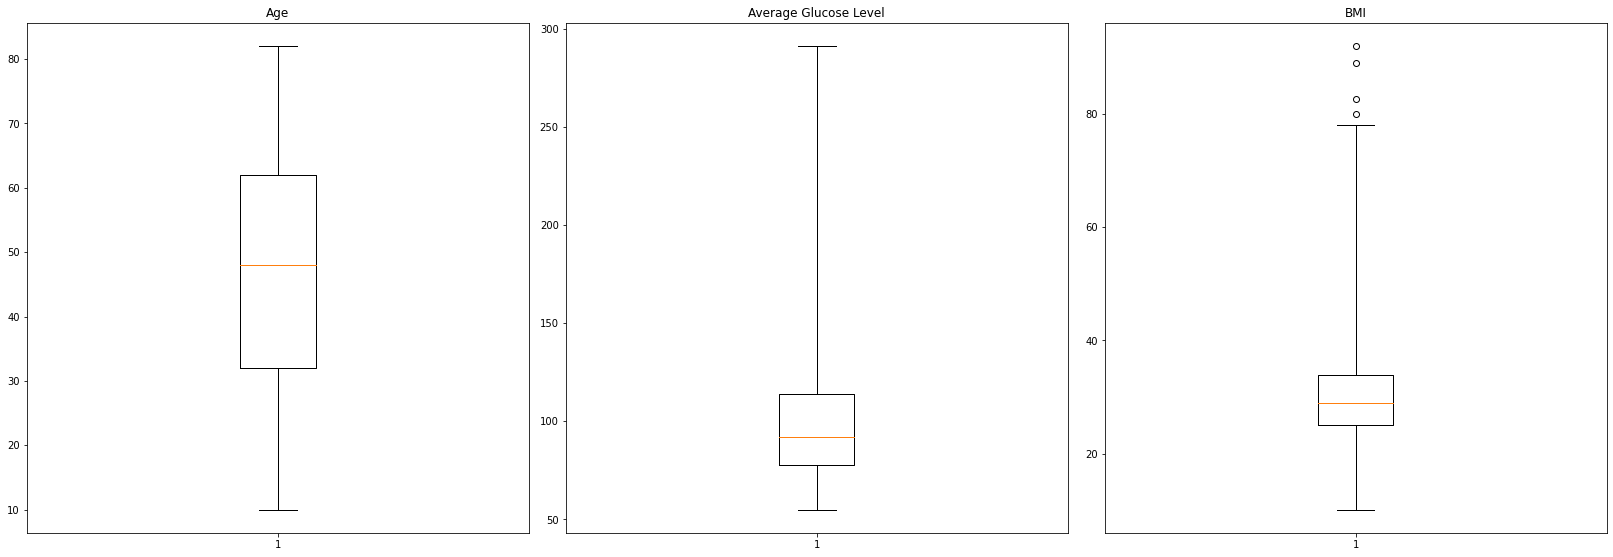

In [32]:
i = 1
plt.figure(figsize=(30,30))
for var in continuous_labels:
   plt.subplot(round(len(continuous_labels),0)/3+3,4,i)
   plt.boxplot(continuous[var],whis=5)
   plt.title(var)
   i+=1
plt.tight_layout()
plt.show()

#Value Counts

In [33]:
print("ID")
print(df['ID'].value_counts())
print()

print("Gender")
print(df['Gender'].value_counts())
print()

print("Age")
print(df['Age'].value_counts())
print()

print("Hypertension")
print(df['Hypertension'].value_counts())
print()

print("Heart Disease")
print(df['Heart Disease'].value_counts())
print()

print("Ever Married")
print(df['Ever Married'].value_counts())
print()

print("Work Type")
print(df['Work Type'].value_counts())
print()

print("Residence Type")
print(df['Residence Type'].value_counts())
print()

print("Average Glucose Level")
print(df['Average Glucose Level'].value_counts())
print()

print("BMI")
print(df['BMI'].value_counts())
print()

print("Smoking Status")
print(df['Smoking Status'].value_counts())
print()

print("Stroke")
print(df['Stroke'].value_counts())
print()

ID
65534    1
19585    1
19530    1
19531    1
19535    1
        ..
42878    1
42881    1
42882    1
42883    1
65538    1
Name: ID, Length: 29072, dtype: int64

Gender
Female    17852
Male      11213
Other         7
Name: Gender, dtype: int64

Age
51.0    586
52.0    560
47.0    549
50.0    544
57.0    543
       ... 
14.0    187
13.0    157
12.0    143
11.0    107
10.0     78
Name: Age, Length: 73, dtype: int64

Hypertension
No     25831
Yes     3241
Name: Hypertension, dtype: int64

Heart Disease
No     27556
Yes     1516
Name: Heart Disease, dtype: int64

Ever Married
Yes    21690
No      7382
Name: Ever Married, dtype: int64

Work Type
Private           18954
Self-employed      5204
Government Job     4196
Children            617
Never Worked        101
Name: Work Type, dtype: int64

Residence Type
Urban    14595
Rural    14477
Name: Residence Type, dtype: int64

Average Glucose Level
87.15     15
73.00     14
83.92     14
91.57     14
96.06     13
          ..
205.97     1
123.3

#General trends for dataset:
* A greater portion of observations are over 50 years old, married, or female.
* There are more observations who have not suffered from hypertension, heart disease, and stroke than those who have.
* A majority of the observations have a private work type or have never smoked. 
* The amount of obervations who live in an urban area (n = 21756) and rural area (n = 21644) are relatively similar.
* The majority of average glucose levels falls within 72.53 - 90.71 and bmi it is between 26.1 - 27.7.




##Visualizations

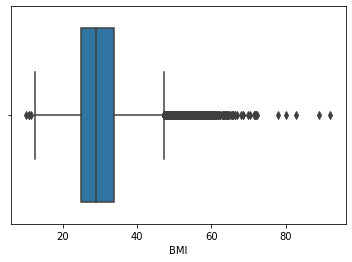

In [34]:
import seaborn as sns         #There are many outlier values for BMI.
sns.boxplot(x=df['BMI'])

This boxplot shows that the distribution for BMI is skewed to the right and there are many outlier values. 

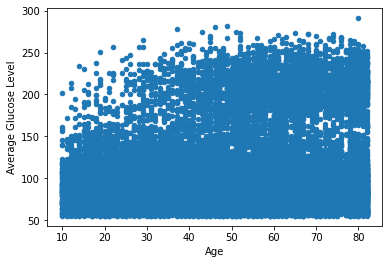

In [35]:
df.plot.scatter(x='Age', y='Average Glucose Level');

There is no correlation between average glucose level and age because many of the points are randomly dispersed rather than condensed in one line.

In [36]:
import plotly.express as px
fig = px.scatter(df, x="Age", y="BMI",color="Hypertension",title = 'Hypertension Rates Across Various Ages and BMI levels')
fig.show()

This scatterplot displays the BMI and ages based on the hypertension status of the individual. In this case the blue dot indicates the individual has suffered from hypertension and the red indicates that they have not. While the red and blue dots are overlapping, there appears to be more no observations than yes across all ages and BMI levels. 

In [37]:
import plotly.express as px
fig=px.pie(df, names = 'Work Type' , title = 'Percentages of the types of jobs participants held' )
fig.show()

This pie chart shows the percentage of how many individuals in this data set fit within each category among the 5 work types.

In [38]:
df=df.groupby(['Hypertension','Gender'],as_index=False)[['Age','BMI','Average Glucose Level']].mean()
df

,Hypertension,Gender,Age,BMI,Average Glucose Level
0,No,Female,45.359064,29.591220,102.268157
1,No,Male,46.961425,29.944321,106.660734
2,No,Other,29.285714,27.900000,96.380000
3,Yes,Female,62.111111,32.913957,124.921456
4,Yes,Male,60.238331,32.377581,127.604420


In [39]:
import plotly.express as px
fig = px.bar(df, x="Gender", y="Average Glucose Level",
             color='Hypertension', barmode='group',
             height=400)
fig.show()

This bar graph shows the average glucose levels for all genders in the dataset with the colors indicating their hypertension status. In general, those who suffered from hypertension have higher glucose levels. Males also had higher glucose levels no matter their hypertension status compared to those who identified as female or other.